<a href="https://colab.research.google.com/github/Sabeerawa05/Datasets-Practices/blob/main/Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#@Sabeer_Saeed_191137127_Software_Engineering_Technology
#The premodel CNN was run via Google Colab. It was very time consuming and some of which my system could not apply resist. I restart and reload, again and again but some features could not be able to finish. So I use the Inception_V3 model and apply the new plant disease datasets from https://www.kaggle.com/noulam/tomato/download which were analyse. I upload the datasets through google Drive which also consumed alot of the time. It could not accept all the items of the dataset on time but it run okay.
#Difficult and Challanges: When I started using the google colab I was able run it when I set batch_size of 16 and Epoch of 10 which gives the result of 0.8936. It consumed so much of time. Mosttime when it is running it will just interrupt itself by hanging and stop loading. I run it almost Everyday.
#Now let start with what I first run via  free google colab.


In [ ]:
#Installing tensorflow gpu

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 21kB/s 


In [ ]:
#Let call the function models for initialization
#The pretrain model is inception_V3
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten #To input Lambd, Dense, Flatten
from keras.models import Model #The keras models
from tensorflow.keras.applications.inception_v3 import InceptionV3 #inception declaration
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
#To load the image genarator and image loader.
#To load the sequential function
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
import numpy as np #N
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# Setting for the re-size of all the images to this range
# But then it will be set to Shape image size 3
IMAGE_SIZE = [224, 224]

# The next is the folder directory location setting. This from the google drive. like I said the uploading of it also consumed alot of time. But it has been upload consist of Test and Valid folders withing the folder of the datasets. Each Test and Valid consist of 8 folders.


In [ ]:
#The training and the validity path location.
train_path = '/content/drive/MyDrive/Programs/Datasets/train'
valid_path = '/content/drive/MyDrive/Programs/Datasets/valid'

In [ ]:
# image input size
# Import the inception_V6 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# For not to execute any existing weights
# for the purpose not to train existing weights setting inception layers trainable to FALSE
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of classes
  # The directory with the * to view the output.
folders = glob('/content/drive/MyDrive/Programs/Datasets/train/*')

In [ ]:
# For to create the  model flatten
x = Flatten()(inception.output)

In [ ]:
# To create the prediction Dense lenght for the model
# We are using softmax since is not binary. In binary we use sugmoid
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object structure
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# To display the structure of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

# From the result above is showing Total params 22,314,794 with 512,010 Trainable and 21,802,784. While loading the datasets it keeps on giving problems. But we still get it up to the proportionately.



In [ ]:
# To tell the model what is totally require and
# To tell the model the optimization procedure to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# To apply the Image Data Generator in order to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# To Make sure I provide the same target size as initialied for the image size
# Because the runtime challange the batch_size is set to as 16 if not it could not (so muchinterruption)
# And the target size is set as 224, 224
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18361 images belonging to 10 classes.


In [ ]:
# For the runtime challange the batch_size is set to as 16
# The directory location also from google
# The target size is also set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Datasets/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4591 images belonging to 10 classes.


In [ ]:
# In order to fit the model
# To Run the given cell. It will take so much of time to execute so the epoch was set as 10
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1148/1148 [==============================] - 1988s 2s/step - loss: 3.3404 - accuracy: 0.7934 - val_loss: 4.7344 - val_accuracy: 0.7617
Epoch 2/10
1148/1148 [==============================] - 1939s 2s/step - loss: 3.3171 - accuracy: 0.8178 - val_loss: 3.4396 - val_accuracy: 0.8192
Epoch 3/10
1148/1148 [==============================] - 1898s 2s/step - loss: 3.1347 - accuracy: 0.8396 - val_loss: 4.8349 - val_accuracy: 0.8033
Epoch 4/10
1148/1148 [==============================] - 1881s 2s/step - loss: 3.0994 - accuracy: 0.8508 - val_loss: 2.8626 - val_accuracy: 0.8519
Epoch 5/10
1148/1148 [==============================] - 1892s 2s/step - loss: 3.0319 - accuracy: 0.8628 - val_loss: 3.8279 - val_accuracy: 0.8345
Epoch 6/10
1148/1148 [==============================] - 1896s 2s/step - loss: 2.7573 - accuracy: 0.8735 - val_loss: 4.2221 - val_accuracy: 0.8249
Epoch 7/10
1148/1148 [==============================] - 1932s 2s/step - loss: 2.7766 - accuracy: 0.8767 - val_loss: 3.3817 -

In [ ]:
# Due to the Epoch was 10 the accuracy able to ascertain by the model is 0.8936
# And may be the datasets images are little bit complicated in loading from the drive
# But never the less the result is an average outcome

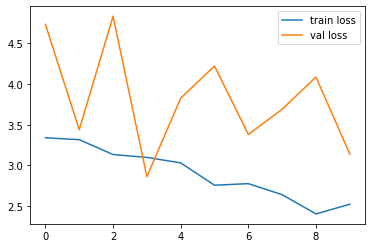

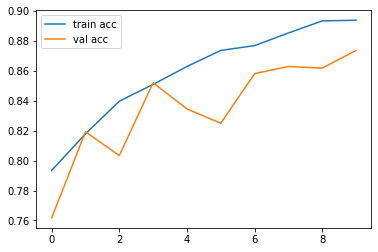

<Figure size 432x288 with 0 Axes>

In [ ]:
# Now let plot the loss graph to see
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# And to also plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
# Let it save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
# To evaluate the predict valid set
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.0000000e+00, 6.0650285e-24, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.4451944e-23, 0.0000000e+00, ..., 0.0000000e+00,
        2.6788853e-31, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 3.7684436e-19, ..., 0.0000000e+00,
        0.0000000e+00, 2.8194165e-37],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 2.1981703e-36, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
# To display the array information
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 3, 0, ..., 3, 9, 4])

# Now that we run and get 90% accracy atleast is reasonable result. To satisfy with the google free colab environment because of the loading problem in the datasets and time consuming in execution. Most time it will take more than 7 seven hours executing then to be interrupted I restart and reload. The dataset is updated with so many attributes so the model requires so much of resource in trying to analyse. But atleast we get 90% which is not bad.

In [ ]:
# Since in the class we did an example using VGG 16 model
# we havXception
# InceptionV3
# ResNet50
# VGG19
# MobileNet
# So this work apply different approach by trying the inception V3 model using the
# new leaf disease datasets from kaggle.
# The result of the accuracy is 0.8936 averagely 90%.